# Part 2: Analysis of listening history

**Part 1: Getting data and saving them here:** [lastfm_downloader.ipynb](get_lastfm_data.ipynb)

In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
import seaborn as sbn
from altair import Chart, X, Y, Color, Scale
import altair as alt
%matplotlib inline

In [5]:
# set up fonts
family = 'monospace'

title_font = fm.FontProperties(family=family, style='normal', size=23, weight='normal', stretch='normal')
label_font = fm.FontProperties(family="DejaVu Sans", style='normal', size=20, weight='roman', stretch='semi-condensed')
ticks_font = fm.FontProperties(family=family, style='normal', size=13, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

## What are the questions I have about my music?


**Basic EDA questions**: 

* ~What are my top 10 artist?~
* ~Top 10 songs?~
* ~Top 10 albums?~

**More thought provoking**:

~The number of "The" amongst the name of bands I listen to?~

~Mean track name length?~

How has my favorite artists change over time? (by the span of 2 months maybe?)

~My listening habit (total number of songs) change over time?~

Music Exploration over time? "New" artist in a year, or month, or time period? Which period is the most fruitful? New songs too?

Binge listening? When am I obsessed with a certain band/music?

Ecletic month? More different artists through time?

~Unique tracks played from same artist?~

~How much of my listening habit is album listening compared to random shuffling? Say 3 consecutive songs from same album vs 3 songs from separate album?~

~Which artist did I listen to a lot in the past but not so much recently? Should I reconnect?~

~How many different albums per month?~

How many songs/albums from Queen did I listen to after watching Bohemian Rhapsody lol (a lot lot lot)

~What is my listening clock? What time am I most likely to listen to music?~

End-of-terms vs normal time during the term?

Seasonal changes to my music habit? Certain artists pop up more?

First year vs second year?

Scrobbles before and after concerts vs usual baseline?

**The following need more info in the data**:
* Anything related to genres? How much did genres change? Top genre per season?
* Music map of all artists I listen to?
* Do something with my friends too? How similar am I compared to my friends on last fm?
* Analyze "liked" tracks
* Compare it to my offline music library to find which track hasn't been listened to (lol)
* I'm curious about music listened through streaming vs offline music? How to do?
* Connect to spotify in order to find some more substantial underlying trends

**Current stretch goals**:
Recommendations? Might need Spotify metadata and Musicbrainz for that.

## Q1: Top artists

In [6]:
artists_most = pd.read_csv('B:\Music Datasets\API Mined\lastfm_top_artists.csv', encoding='utf-8')
artists_most = artists_most.set_index('artist')['play_count'].head(20)
artists_most.head()

artist
Yo La Tengo       1102
Radiohead         1080
David Bowie       1027
Sufjan Stevens     722
The Beatles        663
Name: play_count, dtype: int64

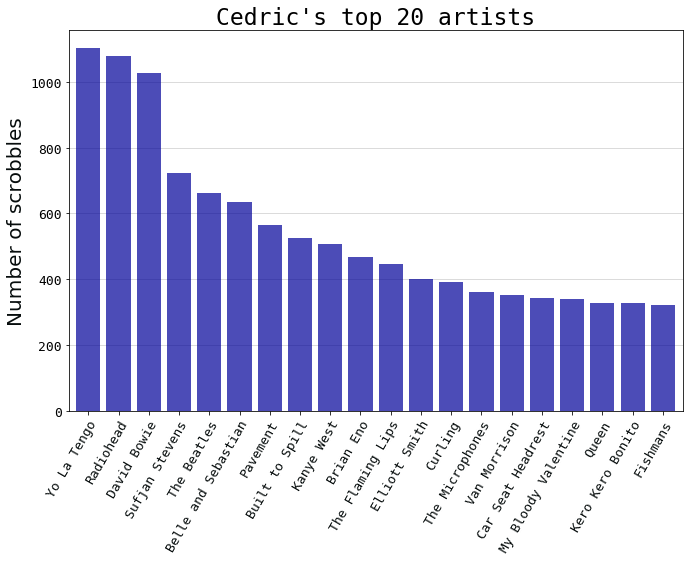

In [7]:
ax = artists_most.plot(kind='bar', figsize=[11, 7], width=0.8, alpha=0.7, color='#000099', edgecolor=None, zorder=2)

ax.set_facecolor('xkcd:white')

ax.yaxis.grid(True, color='lightgrey')
ax.set_xticklabels(artists_most.index, rotation=60, rotation_mode='anchor', ha='right', fontproperties=ticks_font, color="#070d0d")


for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Cedric\'s top 20 artists', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
y = ax.set_ylabel('Number of scrobbles', fontproperties=label_font)
y.set_color("#070d0d")

plt.savefig('lastfm-artists-played-most.png', dpi=96, bbox_inches='tight')
plt.show()

### There's a nice curve over there!

Yo La Tengo, Radiohead, and Bowie are clearly my three favorite. The others are pretty close to each other. I feel like it might imply that I don't heavily favour anyone too much in particular, which is great to confirm!

## Q2:Top tracks

In [8]:
tracks_most = pd.read_csv('B:\Music Datasets\API Mined\lastfm_toptracks.csv', encoding='utf-8')

tracks_most["label"] = tracks_most["artist"] + "\n" + tracks_most["track"]

tracks_most = tracks_most.set_index("label").drop(labels=['artist', 'track'], axis='columns')
tracks_most = tracks_most['play_count'].head(20)
tracks_most.head()

label
Pavement\nGold Soundz               58
Van Morrison\nBallerina             58
Curling\nRadio King                 56
Built to Spill\nCarry the Zero      53
Brian Eno\nOn Some Faraway Beach    49
Name: play_count, dtype: int64

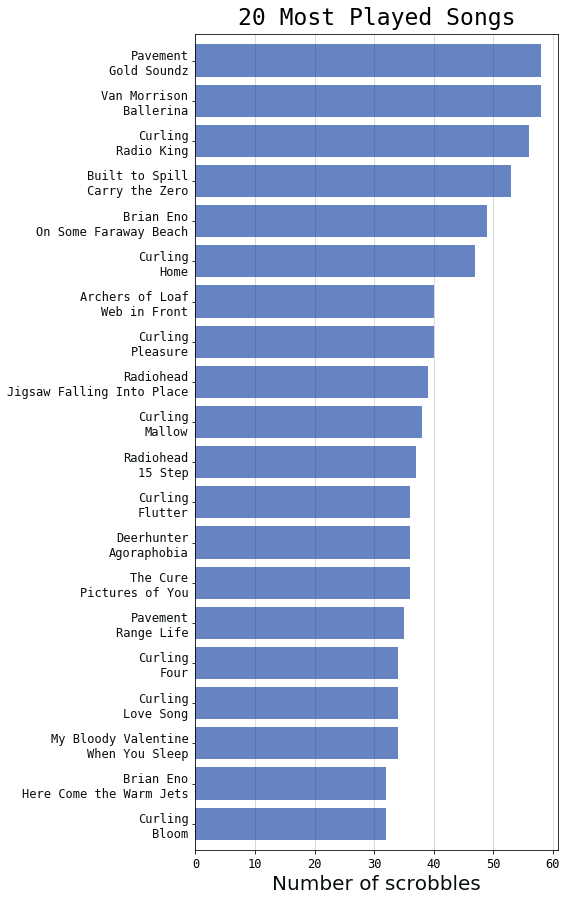

In [9]:
ax = tracks_most.sort_values().plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, 
                                    color='#003399', edgecolor=None, zorder=2)

ax.set_facecolor('xkcd:white')
ax.xaxis.grid(True, color='lightgrey')

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
    
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
    label.set_color("#070d0d")

    
x = ax.set_xlabel('Number of scrobbles', fontproperties=label_font)
x.set_color("#070d0d")
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('20 Most Played Songs', fontproperties=title_font, y=1.005)

plt.savefig('lastfm-tracks-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

### Indie Rock galore! 

Similar to artists, I might not particularly favor any song too much, even though there's a hierachy here. Mostly indie rock though, I need to branch out! This'd be nice if it had a genre coloring for each bar

## Q3: Top albums

In [10]:
albums_most = pd.read_csv('B:\Music Datasets\API Mined\lastfm_top_albums.csv', encoding='utf-8')

albums_most["label"] = albums_most["artist"] + "\n" + albums_most["album"]

albums_most = albums_most.set_index("label").drop(labels=['artist', 'album'], axis='columns')
albums_most = albums_most['play_count'].head(15)
albums_most.head()

label
Curling\nDefinitely Band                            381
Brian Eno\nHere Come The Warm Jets                  305
Radiohead\nIn Rainbows                              283
Yo La Tengo\nI Can Hear the Heart Beating as One    272
Pavement\nCrooked Rain, Crooked Rain                266
Name: play_count, dtype: int64

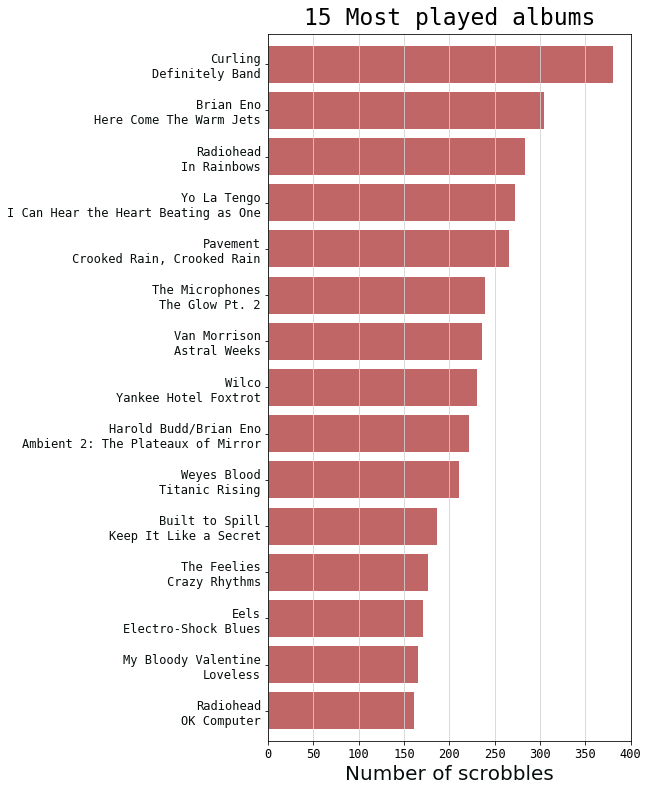

In [11]:
ax = albums_most.sort_values().plot(kind='barh', figsize=[6.5, 13], width=0.8, alpha=0.6, color='#990000', 
                                    edgecolor=None)
ax.set_facecolor('xkcd:white')
ax.xaxis.grid(True, color='lightgrey')

for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font_h)
    
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_h)
    label.set_color("#070d0d")
    
x = ax.set_xlabel('Number of scrobbles', fontproperties=label_font)
x.set_color("#070d0d")
ax.set_ylabel('', fontproperties=label_font)
ax.set_title('15 Most played albums', fontproperties=title_font, y=1.005)

plt.savefig('lastfm-albums-played-most-h.png', dpi=96, bbox_inches='tight')
plt.show()

### Again, mostly indie rock :|

## Move to all the scrobbles!

In [12]:
# read the all-time scrobbles data set
scrobbles = pd.read_csv('B:\Music Datasets\API Mined\lastfm_scrobbles.csv', encoding='utf-8')
# drop timestamp column for later
scrobbles = scrobbles.drop('timestamp', axis=1)

print('Scrobbles:', len(scrobbles))
print('Artists:',len(scrobbles['artist'].unique()))

scrobbles.head(4)

Scrobbles: 41963
Artists: 1400


,artist,album,album_mbid,track,datetime
0,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2020-04-16 04:49:25
1,Yo La Tengo,Summer Sun,ae471e32-e6f9-445e-89f4-2f1e138c648c,Season of the Shark,2020-04-16 04:44:50
2,Aphex Twin,Selected Ambient Works 85-92,0c8b4425-795e-4772-8cbf-e3f9694110cc,Ageispolis,2020-04-16 04:39:26
3,Dinosaur Jr.,Without a Sound,24694020-67b0-466a-bb6b-d43a4c308312,Feel the Pain,2020-04-16 04:35:06


Missing around 2,000 tracks and 20 artists from the actual total :(

Next up, convert the UTC timezone into the EST timezone which is where most of my listening occurs!

In [13]:
#convert timzone 
scrobbles["datetime"] = pd.to_datetime(scrobbles["datetime"])
scrobbles['datetime'] = scrobbles['datetime'].dt.tz_localize('utc')
scrobbles['datetime'] = scrobbles['datetime'].dt.tz_convert('America/New_York')

# parse out date and time into columns

scrobbles['year'] = pd.DatetimeIndex(scrobbles['datetime']).year
scrobbles['month'] = pd.to_datetime(scrobbles['datetime']).dt.to_period('M')
scrobbles['day'] = pd.DatetimeIndex(scrobbles['datetime']).day
scrobbles['hour'] = pd.DatetimeIndex(scrobbles['datetime']).hour
scrobbles['dow'] = pd.DatetimeIndex(scrobbles['datetime']).dayofweek

C:\Users\Cedric\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [14]:
scrobbles[5:3000]

,artist,album,album_mbid,track,datetime,year,month,day,hour,dow
5,The Strokes,Room on Fire,0f3cb2a7-8f63-4fd5-a331-39844400b9e4,12:51,2020-04-16 00:29:40-04:00,2020,2020-04,16,0,3
6,Yo La Tengo,Summer Sun,ae471e32-e6f9-445e-89f4-2f1e138c648c,Nothing But You and Me,2020-04-16 00:24:25-04:00,2020,2020-04,16,0,3
7,Yo La Tengo,I Can Hear the Heart Beating as One,3a5178c8-ce0b-3971-a5f5-a3331972df3f,We're an American Band,2020-04-16 00:17:59-04:00,2020,2020-04,16,0,3
8,Car Seat Headrest,Twin Fantasy,5637ea6c-8089-4923-ba98-72a3b724f3f3,Bodys,2020-04-16 00:03:00-04:00,2020,2020-04,16,0,3
9,of Montreal,"Hissing Fauna, Are You the Destroyer?",12762a06-5457-4afd-a3b4-a5160a30dccc,Heimdalsgate Like A Promethean Curse,2020-04-15 23:59:41-04:00,2020,2020-04,15,23,2
...,...,...,...,...,...,...,...,...,...,...
2995,Beyoncé,I Am...Sasha Fierce,NaN,Halo,2020-03-17 04:43:16-04:00,2020,2020-03,17,4,1
2996,Beyoncé,4,0c3f8de9-4b1c-46ba-8b0b-fac727e03395,Countdown,2020-03-17 04:38:16-04:00,2020,2020-03,17,4,1
2997,Silver Jews,American Water,0e2f1f29-abc5-3543-88b8-211d36585efb,Blue Arrangements,2020-03-17 04:30:06-04:00,2020,2020-03,17,4,1
2998,Silver Jews,American Water,0e2f1f29-abc5-3543-88b8-211d36585efb,People,2020-03-17 04:25:23-04:00,2020,2020-03,17,4,1


I cannot do year-by-year analysis since my data only starts 2 years ago, which makes it super uninteresting. So...
## Q4: Monthly exploration

In [59]:
# count number of tracks played in each month
tracks_month = scrobbles.groupby(['month', 'album']).count().sort_values('datetime', ascending=False)
tracks_month = tracks_month.reset_index()
tracks_month.index = [n + 1 for n in tracks_month.index]

tracks_month = tracks_month['month'].value_counts().sort_index()
tracks_month = pd.DataFrame(tracks_month)
tracks_month.rename(columns = {'month':'plays'}, inplace = True)
tracks_month.index.name = "month"
tracks_month.reset_index()

,month,plays
0,2018-04,19
1,2018-05,19
2,2018-06,20
3,2018-07,10
4,2018-08,18
5,2018-09,50
6,2018-10,44
7,2018-11,292
8,2018-12,418
9,2019-01,252


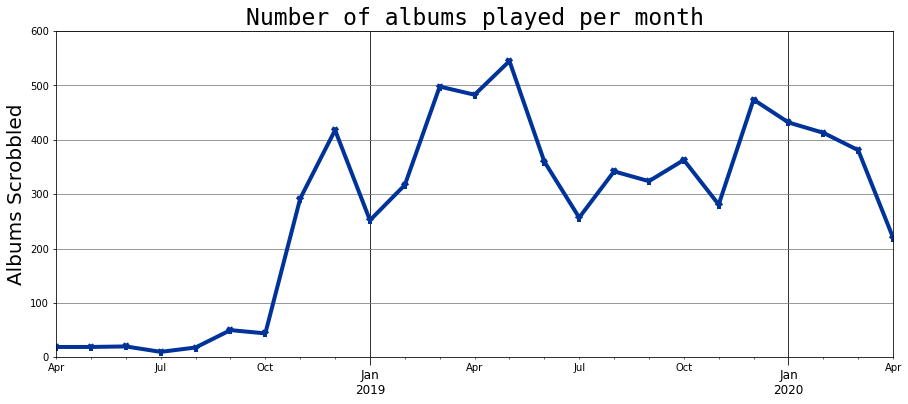

In [115]:
ax = tracks_month.plot(kind='line', figsize=[15, 6], linewidth=4, alpha=1, color='#003399', legend=False,
                       marker='1',  markersize=8, markeredgewidth=4)

ax.set_facecolor('xkcd:white')
ax.xaxis.grid(True, color='black')
ax.yaxis.grid(True, color="grey")

ax.set_ylim(0,600)
ax.set_ylabel('Albums Scrobbled', fontproperties=label_font)
ax.set_xlabel('')

ax.tick_params(axis='x', labelsize= 12, length=8)

ax.set_title('Number of albums played per month', fontproperties=title_font)

plt.savefig('lastfm-scrobbles-per-month.png', dpi=96, bbox_inches='tight')
plt.show()

## Songs by day of week

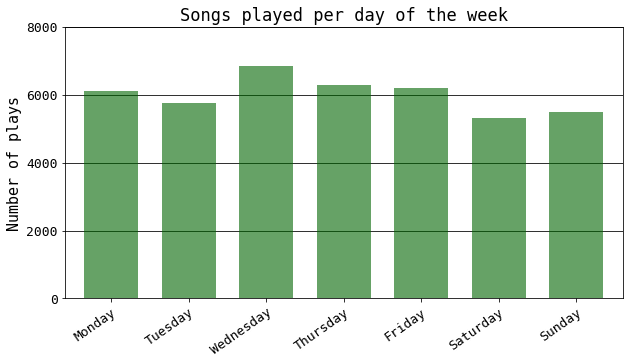

In [369]:
# get the play count sum by day of the week
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = dow_counts.plot(kind='bar', figsize=[10, 5], width=0.7, alpha=0.6, color='darkgreen', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, 8000))
ax.set_title('Songs played per day of the week', fontproperties=fm.FontProperties(family=family, style='normal',
                                                                                  size=17, weight='normal', stretch='normal'))
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of plays', fontproperties=fm.FontProperties(family=family, style='normal',
                                                                  size=15, weight='roman', stretch='normal'))

plt.savefig('lastfm-scrobbles-per-weekday.png', dpi=96, bbox_inches='tight')
plt.show()

## Plays by hour (listening clock)

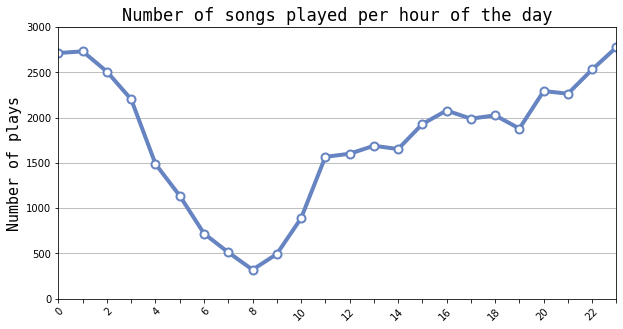

In [92]:
hour_counts = scrobbles['hour'].value_counts().sort_index()

ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.iloc[range(0, len(hour_counts), 2)]
xlabels = [x if x in xlabels else '' for x in hour_counts.index]

ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
ax.set_ylim((0, 3000))
ax.set_ylabel('Number of plays', fontproperties=fm.FontProperties(family=family, style='normal',
                                                                  size=15, weight='normal', stretch='normal'))
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('Number of songs played per hour of the day', fontproperties=fm.FontProperties(family=family, style='normal',size=17,
                                                                                             weight='normal', stretch='normal'))

plt.savefig('lastfm-scrobbles-per-hour.png', dpi=96, bbox_inches='tight')
plt.show()

## Q6: How many different tracks per artist?

How have the cumulative plays of most listened-to artists changed over time?

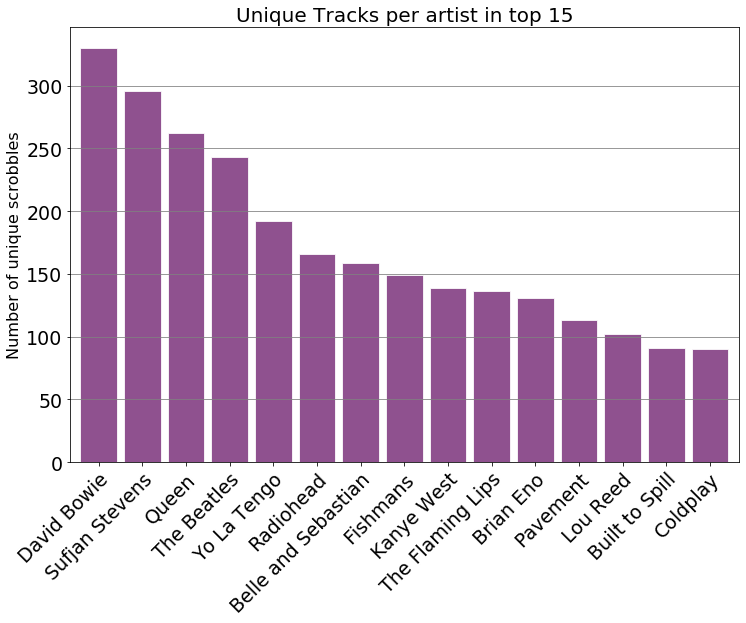

In [342]:
artist_time = scrobbles.groupby(['artist', 'track']).size().groupby(level=0).size().sort_values(ascending=False).head(15)

ax = artist_time.plot(kind='bar', figsize=[20, 10], width=0.84, alpha=0.8, color='#732673', edgecolor='w', grid=False)
    
ax.yaxis.grid(True, color = "grey")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')

plt.gcf().set_size_inches(12, 8)
plt.title('Unique Tracks per artist in top 15', fontdict = {'fontsize' : 20})
plt.ylabel('Number of unique scrobbles', fontdict = {'fontsize' : 16})
plt.xlabel('')

plt.savefig('lastfm-uniqe-tracks-played-per-artist-most-h.png', dpi=96, bbox_inches='tight')


## Q?: How much of my listening habit is album listening compared to random shuffling? 
**Say 3 consecutive songs from same album vs 3 songs from separate album?**

In [329]:
def listening_habit(scrobbles):
    album_counter = 0
    shuffle_counter = 0
    for x in range(0, len(scrobbles) - 3, 3):
        if scrobbles.iloc[x, 1] == scrobbles.iloc[x+1, 1] == scrobbles.iloc[x+2, 1]:
            album_counter +=1
        else:
            shuffle_counter +=1
                
                
    return album_counter * 3, shuffle_counter * 3

In [330]:
(album_scrobbles, shuffled_scrobbles) = listening_habit(scrobbles)
print("Album:", album_scrobbles)
print("Shuffled:", shuffled_scrobbles)

Album: 25941
Shuffled: 16020


It looks like I usually listen to songs off albums much more frequently than from ramdon shuffled playlists! By a large margin! Even when I change the criteria to 4 songs it's still bigger (22,000 album scrobbles vs 19,000 shuffles). Only at 5 consecutive listens did  shuffled listens edge out, only by 3,000 scrobbles! Not much!

I feel like this calls for a pie chart even though I don't really like pie charts :)

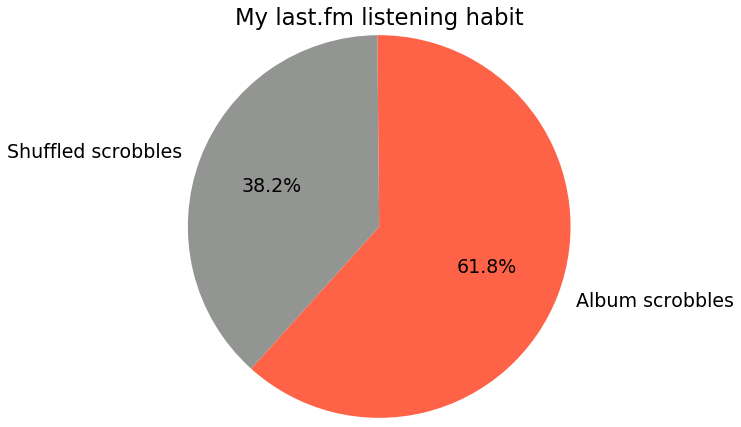

In [343]:
colors = ('tomato', "xkcd:grey")
scrobbles_type = (album_scrobbles, shuffled_scrobbles)

plt.pie(scrobbles_type, labels=("Album scrobbles", "Shuffled scrobbles"), colors=colors, startangle=228, autopct='%.1f%%', radius=2.2)
plt.title("My last.fm listening habit", y=1.4)
plt.rc('font', size=19) 
plt.show()

## Q?: Which artist(s) did I listen to a lot in the past but not so much recently? Should I reconnect?

**Let's say someone that I listened to more than 16 times but I haven't went back for the last year? That should exclude the albums I listen to only once and never again and only leave the artists that I might like :)** 

In [332]:
#the following will return value counts of artists that has listen counts more than 16. Its index is the list of those artists
#then I turn it into a list for easy comparison
artist_list = scrobbles["artist"].value_counts()[scrobbles["artist"].value_counts() > 16].index.values.tolist()


#next up, figure out when was last year? April 15, 2019
scrobbles['datetime'] = scrobbles['datetime'].astype(str)
scrobbles[scrobbles['datetime'].str.contains('2019-04-15')].tail().index

#Sweet! for everything I listened to last year, take the tail's index to now!
last_year_log = scrobbles[0:29799].set_index('artist').index.values.tolist()

#Just need to check to see if the which one in the artist list is not inside the last year's listening history and we'll figure
#that out using set. A set is an unordered list with no duplicates making it easy to check for difference or duplicates!

stranded_artist = (list(set(artist_list) - set(last_year_log)))
print("Bro you should check these people out again:", "\n\n" + "\n\n".join(stranded_artist))

Bro you should check these people out again: 

Ｓｐｏｒｔ３０００

Big Black

Noname

Current 93

WHARFWHIT

J Dilla

Buena Vista Social Club


**I do want to revisit Buena Vista Social Club, J Dilla, No Name, and Current 93! The rest I don't think I'm too enthuasiastic to relisten to though :(**

## Q?: Bands that start with "The"

In [333]:
#make the artist column a series (since np array can't map), find unique values, map the split function to the
#first word before the first space
#then make it lower case, get the count, and show the top 15! That's a mouthful...

first_names = pd.Series(scrobbles['artist'].unique()).map(lambda x: x.split()[0].lower()).value_counts()
the_amount = int(first_names.loc["the"])

So there are 122 bands that starts with "The". Cool cool. Out of how many though?

In [334]:
artists_no = len(scrobbles['artist'].unique())

ratio = the_amount / artists_no
print((ratio * 100),"%")

d = {'Bands with "The"': [the_amount], 'Total artists': [artists_no]}
percentage = pd.DataFrame(d)
percentage

8.714285714285715 %


,"Bands with ""The""",Total artists
0,122,1400


*Around 1/10 of the bands have "the" in it. Talk about cliche!*

## Q?: Correlation between song title name and times played?

**I'm thinking in terms of length (maybe memorable -> more plays?), but I can also look into certain characters relating to this too?**

In [335]:
#First, group song titles to artist. This is a safe guard since a few artists can have a same song title
# I just realized I need to remove the "Remastered" versions too....

df = scrobbles[~scrobbles["track"].str.contains("Remaster|Remastered|Edit|Re-Master|Alternate Version|Mono LP")]

# Count number of occurrences for each track
df['Occur'] = df.groupby('track')['track'].transform('size')

df

C:\Users\Cedric\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist,album,album_mbid,track,datetime,year,month,day,hour,dow,Occur
0,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2020-04-16 00:49:25-04:00,2020,2020-04,16,0,3,13
1,Yo La Tengo,Summer Sun,ae471e32-e6f9-445e-89f4-2f1e138c648c,Season of the Shark,2020-04-16 00:44:50-04:00,2020,2020-04,16,0,3,10
2,Aphex Twin,Selected Ambient Works 85-92,0c8b4425-795e-4772-8cbf-e3f9694110cc,Ageispolis,2020-04-16 00:39:26-04:00,2020,2020-04,16,0,3,9
3,Dinosaur Jr.,Without a Sound,24694020-67b0-466a-bb6b-d43a4c308312,Feel the Pain,2020-04-16 00:35:06-04:00,2020,2020-04,16,0,3,7
4,Stella Donnelly,Beware of the Dogs,13bcbdf0-6852-4218-bc46-9d7f12d722e6,Season’s Greetings,2020-04-16 00:32:16-04:00,2020,2020-04,16,0,3,10
...,...,...,...,...,...,...,...,...,...,...,...
41958,Frank Ocean,Blonde,08f54f68-7c89-4e22-8a0f-ac2b06e48568,Solo,2018-04-20 13:16:27-04:00,2018,2018-04,20,13,4,4
41959,Frank Ocean,Blonde,08f54f68-7c89-4e22-8a0f-ac2b06e48568,Be Yourself,2018-04-20 13:14:59-04:00,2018,2018-04,20,13,4,4
41960,Frank Ocean,Blonde,08f54f68-7c89-4e22-8a0f-ac2b06e48568,Ivy,2018-04-20 13:11:53-04:00,2018,2018-04,20,13,4,13
41961,Frank Ocean,Blonde,08f54f68-7c89-4e22-8a0f-ac2b06e48568,Pink + White,2018-04-20 13:11:53-04:00,2018,2018-04,20,13,4,4


In [336]:
#get a list of tracks
test = df.groupby("artist")["track"].apply(lambda x: x.unique()).reset_index()

#convert these lists to string
test["track"] = [','.join(map(str, list)) for list in test['track']]

temp_list = []

for row in test["track"]:
    temp_list.append(row)
    
import re
    
song_list = []
for i in temp_list:
    song_list.extend(re.split(r',+(?=[^()]*(?:\(|$))', i)) #this will ignore commas inside parathenses using regular expression
len(song_list)

16705

There are 16,705 different songs in my dataset. Sweet!

In [337]:
#calculate mean of song length for reference:
total_length = 0 
for i in song_list:
    total_length += len(i)
avg = total_length / len(song_list)
print(avg)

15.81628255013469


So it's about 15.8 characters. 16. So, about the length of "Speed Of Sound"

**Let's add all these info into a df first!**

In [338]:
#Add all track lengths to a column
song_length =[]
for i in song_list:
    song_length.append(len(i))

d = {"track": song_list, "track_character_length" : song_length} 

d = pd.DataFrame(data=d)

d

,track,track_character_length
0,Southern Sky,12
1,SugarHouse (Live),17
2,Crime,5
3,Cow,3
4,In My Arms,10
...,...,...
16700,Ｄｉｇｉｔａｌ Ｐａｒｔｉｃｌｅ,16
16701,Ｃａｌｃｕｌａｔｉｎｇ Ｓｐａｃｅ,17
16702,Ｉｎｆｏｓｐｈｅｒｅ,10
16703,Where The Sunrise Dies,22


In [339]:
df = df.merge(d, on='track')
df

,artist,album,album_mbid,track,datetime,year,month,day,hour,dow,Occur,track_character_length
0,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2020-04-16 00:49:25-04:00,2020,2020-04,16,0,3,13,45
1,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2019-12-31 07:59:43-05:00,2019,2019-12,31,7,1,13,45
2,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2019-10-22 19:50:12-04:00,2019,2019-10,22,19,1,13,45
3,Spiritualized,Ladies and Gentlemen We Are Floating in Space,02c019fd-a51a-48b2-bd8f-a64803537dc1,Ladies and Gentlemen We Are Floating in Space,2019-05-31 19:37:00-04:00,2019,2019-05,31,19,4,13,45
4,Spiritualized,Ladies & Gentlemen We Are Floating In Space,NaN,Ladies and Gentlemen We Are Floating in Space,2019-04-11 03:28:13-04:00,2019,2019-04,11,3,3,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...
45290,Farrah Abraham,My Teenage Dream Ended,badc44d2-441e-4dab-8628-3574823589c6,With Out This Ring...,2018-04-21 09:55:23-04:00,2018,2018-04,21,9,5,2,21
45291,Farrah Abraham,My Teenage Dream Ended,badc44d2-441e-4dab-8628-3574823589c6,Caught in the Act,2018-04-21 09:53:38-04:00,2018,2018-04,21,9,5,1,17
45292,Farrah Abraham,My Teenage Dream Ended,badc44d2-441e-4dab-8628-3574823589c6,After Prom,2018-04-21 09:50:38-04:00,2018,2018-04,21,9,5,1,10
45293,Farrah Abraham,My Teenage Dream Ended,badc44d2-441e-4dab-8628-3574823589c6,The Phone Call That Changed My Life,2018-04-21 09:46:39-04:00,2018,2018-04,21,9,5,1,35


In [340]:
df = df[["track", "Occur", "track_character_length"]]
df.drop_duplicates()

,track,Occur,track_character_length
0,Ladies and Gentlemen We Are Floating in Space,13,45
13,Season of the Shark,10,19
23,Ageispolis,9,10
32,Feel the Pain,7,13
39,Season’s Greetings,10,18
...,...,...,...
45289,With Out This Ring...,2,21
45291,Caught in the Act,1,17
45292,After Prom,1,10
45293,The Phone Call That Changed My Life,1,35


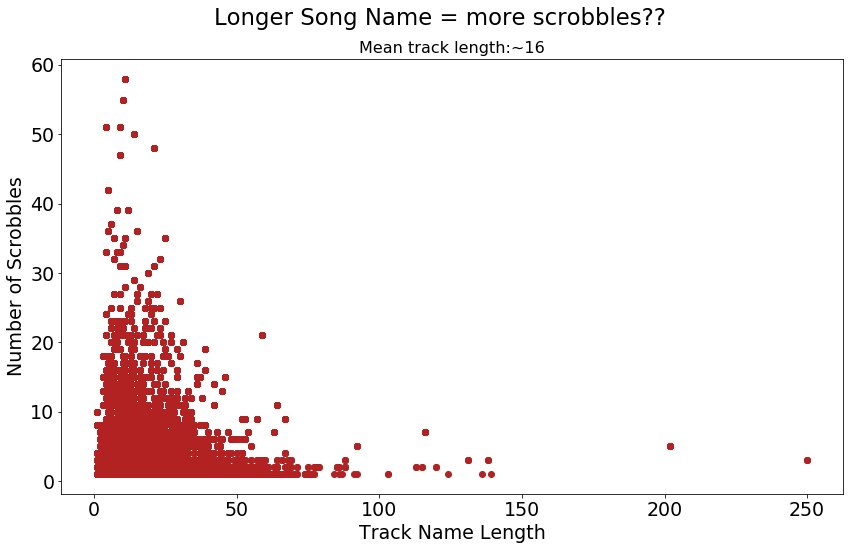

In [388]:
#df.plot.line()
x = df['track_character_length']
y = df['Occur']


plt.figure(figsize=(14,8))
plt.scatter(x, y, color = "firebrick")
plt.suptitle("Longer Song Name = more scrobbles??", y = 0.97)
plt.title("Mean track length:~16", fontsize=16)
plt.xlabel("Track Name Length")
plt.ylabel("Number of Scrobbles")
plt.rc('font', size=19)

plt.savefig('songname vs scrobbles.png', dpi=96, bbox_inches='tight')